In [1]:
print('hello python')

hello python


In [3]:
print('hello python')

hello python


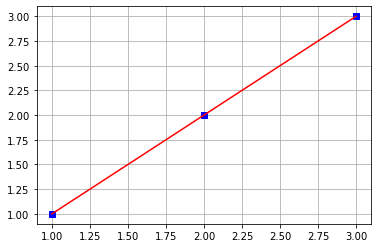

In [8]:
# 주피터 노트북 내에 그래프 그리기 => anaconda의 jupyter note book은 이거가 default로 설정 되어 있음.
%matplotlib inline 


import numpy as np               # numerical computing - c package
import matplotlib.pyplot as plt  # plotting core

x = np.array([1,2,3]) #메모리를 아끼고 tensor flow에서 속도를 빠르게 하기 위해서 numpy의 array형태로 처리
y = np.array([1,2,3]) #list item 1개는 8 byte

plt.plot(x,y, 'bs' ) #점 찍기 o는 큰점 .는 작은 점 ^는 세모, s는 네모square, d는 diamond / 앞에 색깔 넣을 수 있다. r b..
plt.plot(x,y, 'r-' ) # red -실선 --점선...

plt.grid(True) #격자 보이기 
plt.show()

# 케라스로 구현한 선형회귀

In [ ]:
from keras.models import Sequential # 케라스의 Sequential()을 임포트
from keras.layers import Dense      # 케라스의 Dense()를 임포트
from keras import optimizers        # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5]) 
Y=np.array([1,2,3,4,5]) 

model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='mse',metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=100, shuffle=False)

print(model.predict(X))
plt.plot(X, Y, 'bo')
plt.plot(X, model.predict(X), 'r-')
plt.show()

<class 'int'>
<class 'numpy.ndarray'>
1
(3,)
3
3
3


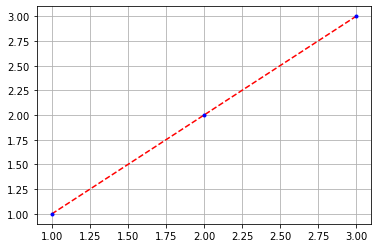

In [17]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

a=(3)
print(type(a))

x = np.array([1,2,3])
y = np.array([1,2,3])
print(type(x))
print(x.ndim)  # x의 n dimension? 몇 차원? = 1
print(x.shape) # 형상 (3,) => tuple로 처리하기 위해 ,가 들어가 있음 (3,1)이면 2차원 배열이다. [[1],[2],[3]] 이런거임 1차원만 ,로 끝남
print(x.shape[0]) #tuple의 첫 번째 item int 3
print(len(x)) #윗 줄과 동일한 내용임

print(len(x))

plt.plot(x,y, 'r--' )
plt.plot(x,y, 'b.' )

plt.grid(True)
plt.show()

[0. 0. 0.]
3
3
[0. 0. 0.]


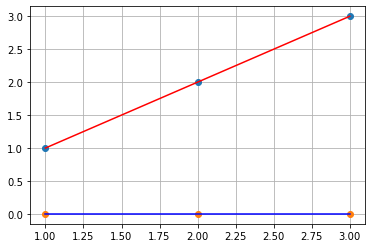

In [18]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

x = np.array([1,2,3])
y = np.array([1,2,3])

w = 0
b = 0

y_hat = np.zeros(3) #3개짜리 array를 생성하는데 0으로 초기화 해 줌
print(y_hat)
print(len(x))
print(x.shape[0])

for i in range(len(x)):
    y_hat[i] = w*x[i] + b;
print(y_hat)

plt.plot(x,y, 'o' )
plt.plot(x,y, 'r-' )

plt.plot(x,y_hat, 'o' )
plt.plot(x,y_hat, 'b-' )

plt.grid(True)
plt.show()

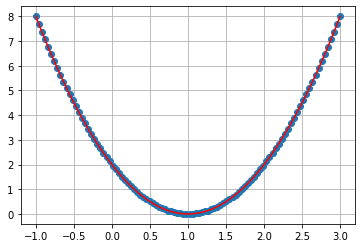

In [19]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = np.linspace(-1,3,100) #-1부터 3까지 100의 좌표를 만들어 줌 (특정 범주 내 좌표를 만들어 줌)
#print(w)
#print(len(w))
b = 0

j = np.zeros(100) #초기화

for i in range(len(w)):
    y_hat = w[i]*2 + b; #x는 고정 2,2에서 확인  -> hyperthys
    j[i] = 0.5 * (y_hat - 2)**2 #x가 2이니 y도 2)  -> 손실함수 그래프1

plt.plot(w,j, 'o' )
plt.plot(w,j, 'r-' )

plt.grid(True)
plt.show()

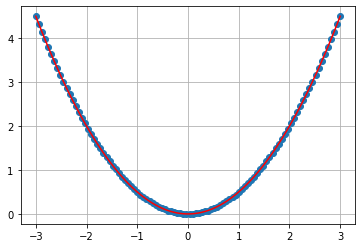

In [20]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = 1
b = np.linspace(-3,3,100) #bias구하기 위함

j = np.zeros(100)
for i in range(len(b)):
    y_hat = w*2 + b[i];
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(b,j, 'o' )
plt.plot(b,j, 'r-' )

plt.grid(True)
plt.show()

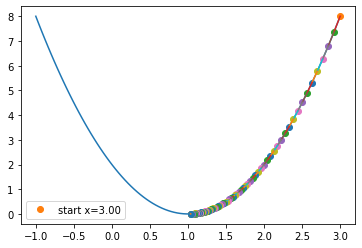

In [31]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size
def f(w) : # A parabola cost function j = 1/2*(y_hat - y)^2 = 1/2*(w*x+b - y)^2 우리는 x=2, y=2, bias=0 인 경우를 하고 있었으므로 아래로 나타냄
    f = 0.5*(w*2-2)**2
    return f
def Df(w) : # The derivative (gradient) page 46 w로 편미분한 값은 x(h_hat - y)이므로 x(wx+b - y) = 2*(w*2 - 2) 이다.
    Df = 2*(w*2-2)
    return Df
def xp1(w,alpha) : # update. alpha는 learning rate입니다.  
    xp1 = w - alpha * Df(w) #정확한 값을 찾을 때 까지 반복 p. 45 new w = w - learning rate * cost fuction 미분한거(1/2*(y-y_hat)^2 미분한거
    return xp1 # Df(w)가 위를편미분한 값이다

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-1,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 100 )

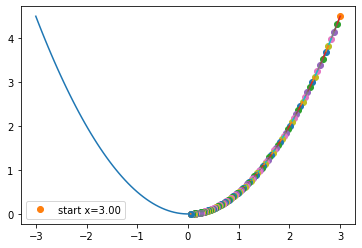

In [23]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

# simple function to demo step size # page 49의 좌상단 그림
def f(x) : # A parabola #여기가 왜 이렇게 나오게 되었는지 잘 모르겠음 bias로 편미분하는 계산식에서 f(x)와 Df(x)의 식을 어떻게 도출하는지?
    f = 0.5*x**2
    return f
def Df(x) : # The derivative (gradient)
    Df = (-x)*2
    return Df
def xp1(x,alpha) : # update
    xp1 = x + alpha * Df(x)
    return xp1

def plot_steps( guess, alpha, nsteps) :
    fig, ax = plt.subplots()
    x = np.linspace(-3,3,100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x,f(x), 'o', label='start x=%.2f' %x )
    for i in range(nsteps):
        xold = x
        x = xp1(x,alpha)
        #ax.plot(x,f(x), 'o', label='x = %.2f' %x)
        ax.plot(x,f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
    plt.legend()
    plt.show()
    
plot_steps( 3, 0.01, 200 )

(442, 10)
(442,)
(442,)


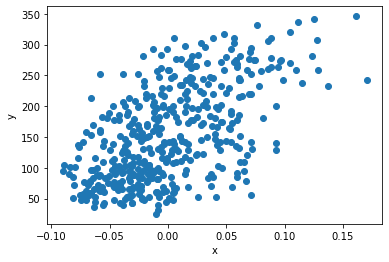

In [33]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt
# print(diabetes)
print(diabetes.data.shape) #데이터가 몇 명분? (442, 10) 442명, 10개의 특성 (2차원 배열)
print(diabetes.target.shape) # (442,) 결과가 1가지 니깐
x = diabetes.data[:, 2] #bmi만 확인 당뇨병 수치에 영향을 많ㅇ이 미쳐셔 뽑아 봄
print(x.shape)
y = diabetes.target

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

w= 942.7013592248312
b= 151.74608061033615


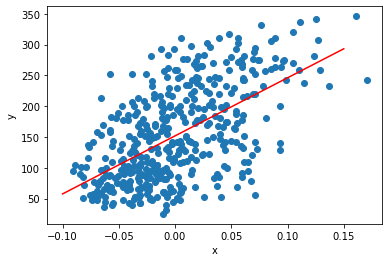

In [38]:
w = 1.0
b = 1.0
rate = 0.01
for i in range(1000):#ephoc를 100번 돌리자
    for x_i, y_i in zip(x, y): #zip? 두개의 container를 동시에 뽑아낼 때 씀
        y_hat = x_i * w + b # 예측치
        err = y_hat - y_i #에러=예측값-실측값
        w = w - rate * err * x_i # w 편미분
        b = b - rate * err #bias의 편미분

print('w=', w);
print('b=', b);
        
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100, rate=0.01):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_hat - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트
                
neuron = Neuron()
neuron.fit(x, y, epochs=1000)

plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]],'r')

plt.plot(0.18, 0.18 * neuron.w + neuron.b, 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'x' is not defined